KNN tweaked.
Sometimes, when the classes are unbalanced, it won't find the best classification

In [3]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


In [33]:
# Create a dataset
df = pd.DataFrame(
    {'group': ['gold', 'gold', 'gold',
               'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue'],
     'x':[1, 1.2, 1.3,
          5, 5.6, 5.5, 5.44, 5.89, 5.1, 5.22, 5.4, 5, 5.77],
     'y': [3, 3.2, 3.3,
          7, 7.6, 7.5, 7.44, 7.9, 7.16, 7.2, 7.44, 7.5, 7.7]}
)

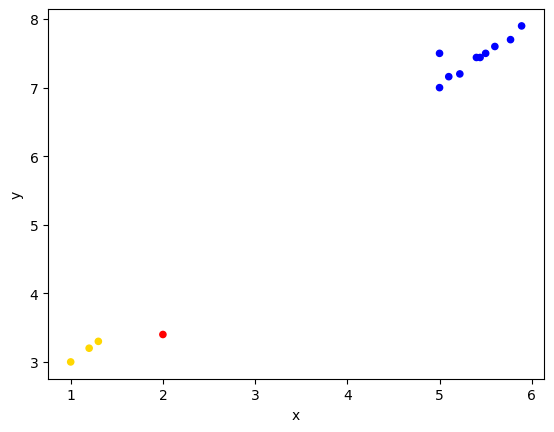

In [32]:
# Plot x, y, by color group
df.plot.scatter(x='x', y='y', c='group');

In this first case, we are using the KNN classifier with the default for agument weights as *uniform*. Notice that if we use up to 5 nieghbors, the classification will be as expected = **gold**, since it's closer to the yellow points. In this case, the KNN algorithm is finding all the 3 yellow dots and only 2 blue dots as the nearest neighbors.

Once it goes to 7 or more neighbors, the algorithm will always find more blue dots, since the classes are unbalanced, thus biasing the classification.

In [41]:

# X and Y
X = df[['x', 'y']]
y = df['group']

# Instantiate KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Fit
knn.fit(X,y)

# NEW Observation
new = pd.DataFrame({'x':2, 'y':3.4}, index=[0])

# predict
knn.predict(new)

array(['gold'], dtype=object)

To correct that, just use the argument **weights** as *'distance'*, so the distance will also be taken in consideration before the final classification.
Here, the classification is *gold* even if we use 10 nearest neighbors.

In [42]:
# Instantiate KNN using the weights argument
knn = KNeighborsClassifier(n_neighbors=10, weights='distance')

# Fit
knn.fit(X,y)

# NEW Observation
new = pd.DataFrame({'x':2, 'y':3.4}, index=[0])

# predict
knn.predict(new)

array(['gold'], dtype=object)